#### **Dependencies**

In [3]:
from googleapiclient.discovery import build
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import isodate #handling ISO 8601 time format used for youtube video duration

**Trending YouTube Videos Kenya**

Any blogpost can provide a list of top YouTue channels in Kenya, what is different about my analysis?

Well, besides obtaining the top youtube channels in Kenya, the article I'll write will provide more insight on certain statistics such as number of uploads, median upload times and potentially more.

In [5]:
youtube = build('youtube','v3',developerKey=API_key)

**Understanding the different video categories present in Kenya**

In [6]:
request = youtube.videoCategories().list(
  regionCode='KE',
  part="snippet"
)
response = request.execute()
all_categories=[]
for item in response['items']:
  categories = dict(
    Category_ID = item['id'],
    Category_Name = item['snippet']['title']
  )
  all_categories.append(categories)
yt_categories = pd.DataFrame(all_categories)
yt_categories.set_index('Category_ID',inplace=True)
yt_categories


,Category_Name
Category_ID,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


YouTube Videos can be categorised into 44 possible categories.

The approach here is to obtain the trending videos in Kenya and their statistics as well as the video category for the videos to provide information to content creators on the most lucrative categories for content creation. The category ID is an attribute presnet in all videos and can thus be used to group data to be scarpped on trending videos.

**Most popular videos Kenya**

The most popular videos in Kenya will not necessarily be videos from Kenan content creators. To obtain top videos from Kenyan youtubers, idea: use a videos metadata.

**Special consideration:** the YouTube API can only handle a maxium of 50 responses for a request at a time. To handle more than 50 records, used pagination.

In [7]:
# function to fetch top 100 trending Videos in Kenya
def get_trending(youtube,region_code,max_results=100):
  top_videos =[]
  # fetching videos
  request = youtube.videos().list(
    part="snippet,contentDetails,statistics",
    chart = 'mostPopular',
    regionCode = region_code,
    maxResults = 50
  )
  #pagination
  while request and len(top_videos)< max_results:
    response = request.execute()
    for item in response['items']:
      top_vids_details = dict(
        video_id = item['id'],
        time_published = item['snippet']['publishedAt'],
        channel_ID = item['snippet']['channelId'],
        channel_title = item['snippet']['channelTitle'],
        video_title = item['snippet']['title'],
        Category_ID = item['snippet']['categoryId'],
        video_duration = item['contentDetails']['duration'],
        licensed_content = item['contentDetails']['licensedContent'],
        views = item['statistics'].get('viewCount',0),
        likes=item['statistics'].get('likeCount',0),
        favourites = item['statistics'].get('favoriteCount', 0),
        comments = item['statistics'].get('commentCount',0)
      )
      top_videos.append(top_vids_details)

    request = youtube.videos().list_next(request, response)
  return top_videos

In [8]:
# Kenya trending videos
kenya_trending = get_trending(youtube,region_code='KE')

In [9]:
# create a dataframe
trending_videos = pd.DataFrame(kenya_trending)
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   video_id          100 non-null    object
 1   time_published    100 non-null    object
 2   channel_ID        100 non-null    object
 3   channel_title     100 non-null    object
 4   video_title       100 non-null    object
 5   Category_ID       100 non-null    object
 6   video_duration    100 non-null    object
 7   licensed_content  100 non-null    bool  
 8   views             100 non-null    object
 9   likes             100 non-null    object
 10  favourites        100 non-null    object
 11  comments          100 non-null    object
dtypes: bool(1), object(11)
memory usage: 8.8+ KB


In [10]:
#data type conversions
trending_videos['time_published']=pd.to_datetime(trending_videos['time_published'])
trending_videos['views']=pd.to_numeric(trending_videos['views'])
trending_videos['likes']=pd.to_numeric(trending_videos['likes'])
trending_videos['favourites']=pd.to_numeric(trending_videos['favourites'])
trending_videos['comments'] = pd.to_numeric(trending_videos['comments'])

In [11]:
trending_videos.isnull().sum()

video_id            0
time_published      0
channel_ID          0
channel_title       0
video_title         0
Category_ID         0
video_duration      0
licensed_content    0
views               0
likes               0
favourites          0
comments            0
dtype: int64

In [12]:
trending_videos.describe().T

,count,mean,std,min,25%,50%,75%,max
views,100.00,20896464.07,30027474.86,68720.00,866274.50,7810950.00,28065277.00,177174630.00
likes,100.00,505062.87,728967.24,0.00,11175.50,199690.50,655999.50,3314618.00
favourites,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
comments,100.00,5002.95,13286.01,22.00,414.25,1313.00,2876.00,87091.00


In [13]:
trending_videos

,video_id,time_published,channel_ID,channel_title,video_title,Category_ID,video_duration,licensed_content,views,likes,favourites,comments
0,KDorKy-13ak,2025-02-10 03:22:55+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,Kendrick Lamar's Apple Music Super Bowl Halfti...,17,PT13M25S,True,27823334,1439425,0,87091
1,3zxaZZEB9BI,2025-02-07 17:04:12+00:00,UCKVsdeoHExltrWMuK0hOWmg,KTN News Kenya,Rais Ruto akatiza hotuba yake baada ya kukumba...,25,PT1M50S,True,297585,1917,0,615
2,EIctJfDxHus,2025-02-04 06:00:06+00:00,UCcVlJCxIqvZowxxzxY2QXEA,Recap Mood,🍌Did you know you can make a DIY banana lamp!💡,26,PT1M25S,True,7910851,182992,0,1137
3,IFFPe9XVq8Y,2025-02-06 20:26:43+00:00,UCb9A6uotqUiuVCvVp4GMqOg,Justin Flom,Secret to sawing daughter in half,24,PT40S,True,29663832,539165,0,2018
4,CLheBLtj1FI,2025-01-31 07:00:08+00:00,UCgdVgtJQXxebSiSAzlhYczw,Willy Paul Thee Pozze,Willy Paul x Bahati - Keki - ( Official Music ...,10,PT3M7S,True,1591400,38431,0,4853
...,...,...,...,...,...,...,...,...,...,...,...,...
95,EUNQFUpaaz0,2025-01-23 18:00:22+00:00,UC0Wju2yvRlfwqraLlz5152Q,PANDA BOI,REAL OR CAKE? (Part 8) feat @PANDAGIRLOFFICIAL...,23,PT23S,True,16889677,466892,0,406
96,yy1DDdoHSD4,2025-01-25 08:00:06+00:00,UC660YaiakYmU1AfOW3sabvQ,St Rembo TV,KENYAN LADIES CRAZY ABOUT HANDSOME MAN 😍😜 FULL...,24,PT1H5M32S,True,229247,1805,0,137
97,8dy8KTTQWMw,2025-01-20 07:30:02+00:00,UCovvTRDnB3XraOrB9jiSB3A,好人小丑,coco被欺负了 #小丑 #天使 #shorts,22,PT50S,True,34626200,968740,0,1306
98,aKTPldXMfRI,2025-01-18 17:59:08+00:00,UCqONv8hrKKTd0ELJcxOVNJQ,The Prince Family Clubhouse,WHO IS HEAVIER #shorts,20,PT35S,True,16654718,385184,0,185


**Understanding the distribution of YouTube videos statistics**

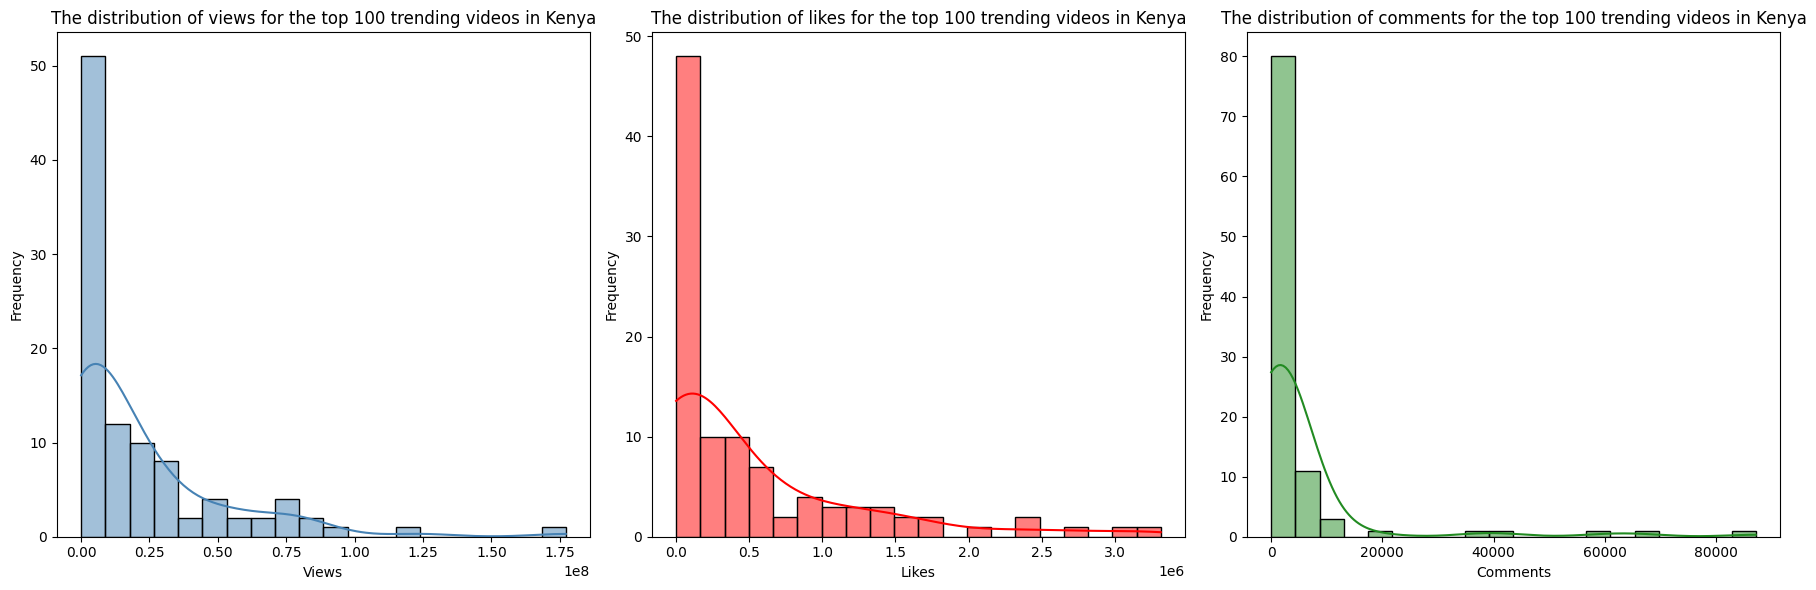

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
# views
sns.histplot(trending_videos['views'],bins=20,kde=True,color='steelblue')
plt.title("The distribution of views for the top 100 trending videos in Kenya")
plt.xlabel('Views')
plt.ylabel("Frequency");
#likes
plt.subplot(1,3,2)
sns.histplot(trending_videos['likes'],bins=20,kde=True,color='red')
plt.title("The distribution of likes for the top 100 trending videos in Kenya")
plt.xlabel('Likes')
plt.ylabel("Frequency");
# comments
plt.subplot(1,3,3)
sns.histplot(trending_videos['comments'],bins=20,kde=True,color='forestgreen')
plt.title("The distribution of comments for the top 100 trending videos in Kenya")
plt.xlabel("Comments")
plt.ylabel("Frequency");

plt.tight_layout();


**Observation**

The distributions of views, likes and comments are right skewed; most videos have lower counts while a few videos have significantly higher counts

***Views:***  Most videos receive a modest number of views, but a few videos (often viral or highly popular) accumulate a vast number of views.

**Impact:** This skewness implies that while most content might not go viral, the few videos that do can achieve extraordinarily high view counts.

***Likes:*** similar to views, most videos get a moderate number of likes, but a few videos receive a large number of likes.

**Engagement Insight:** High numbers of likes for a few videos can indicate that certain content resonates exceptionally well with viewers.

***Comments:*** The distribution of comments is also right-skewed, meaning most videos receive fewer comments, while some highly engaging videos receive a large volume of comments.

**Audience Interaction:** Videos with a large number of comments often provoke discussion or controversy, which can lead to higher engagement.

**Establishing the relationship between the three engagement metrics**

Since likes, views and comments are the main statistics of any given YouTube video, let's look into whether the metrics influence each other

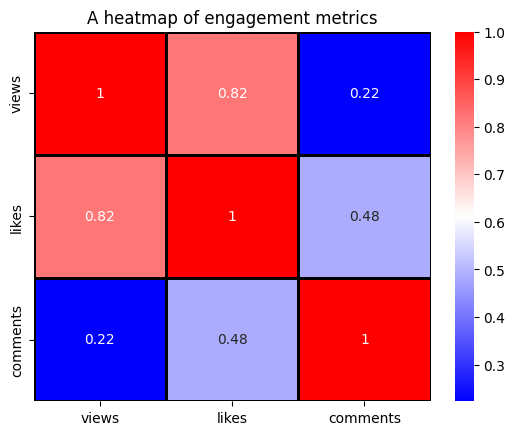

In [15]:
correlation_matrix = trending_videos[['views','likes','comments']].corr()
correlation_matrix
sns.heatmap(correlation_matrix,annot=True,cmap='bwr',linecolor='black',linewidths=0.9);
plt.title("A heatmap of engagement metrics");

**Interpretation**

views and likes (0.82):
- There is a strong positive correlation between views and likes.
  - Interpretation: There is a strong relationship between the number of views and the number of likes. As the number of views on a video increases, the number of likes tends to increase as well. This suggests that videos with more views are generally liked more, likely due to higher exposure leading to more positive interactions.

views and comments (0.22):
- There is a weak postive correlation between views and comments. 
  - Interpretation: There is a weak relationship between views and comments. Videos with more views tend to get more comments, but the correlation is not as strong as with likes. This could mean that while view counts significantly impact likes, the relationship with comments is less pronounced.

likes and comments (0.48):

- There is a moderate to strong postive correlation between likes and comments.
  - Interpretation: There is a moderate to strong positive relationship between likes and comments. Videos that receive more likes also tend to get more comments. This suggests that higher engagement (likes) might encourage or correlate with more discussion (comments), potentially because more engaged viewers are more likely to comment.

**Analysing video metrics per category**

In [16]:
trending_videos = pd.merge(trending_videos,yt_categories,how='left',on='Category_ID')

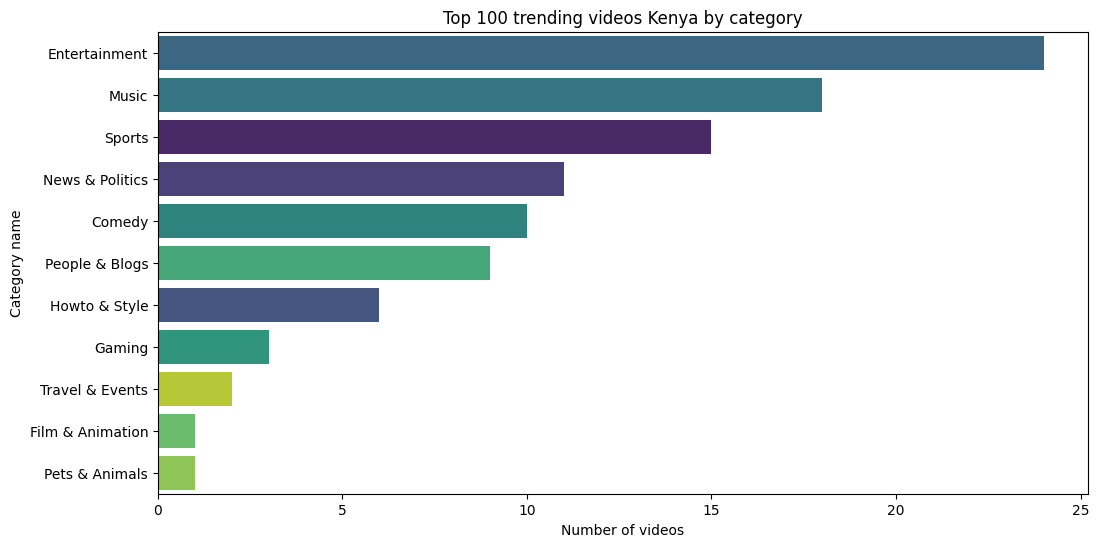

In [17]:
category_counts = trending_videos['Category_Name'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(y=trending_videos['Category_Name'],palette='viridis',order=category_counts.index,hue=trending_videos['Category_Name'])
plt.title("Top 100 trending videos Kenya by category")
plt.xlabel("Number of videos")
plt.ylabel("Category name");

Most of the trending videos are from Music, Entertainment and Sports.

**Average Engagement metrics by Category**

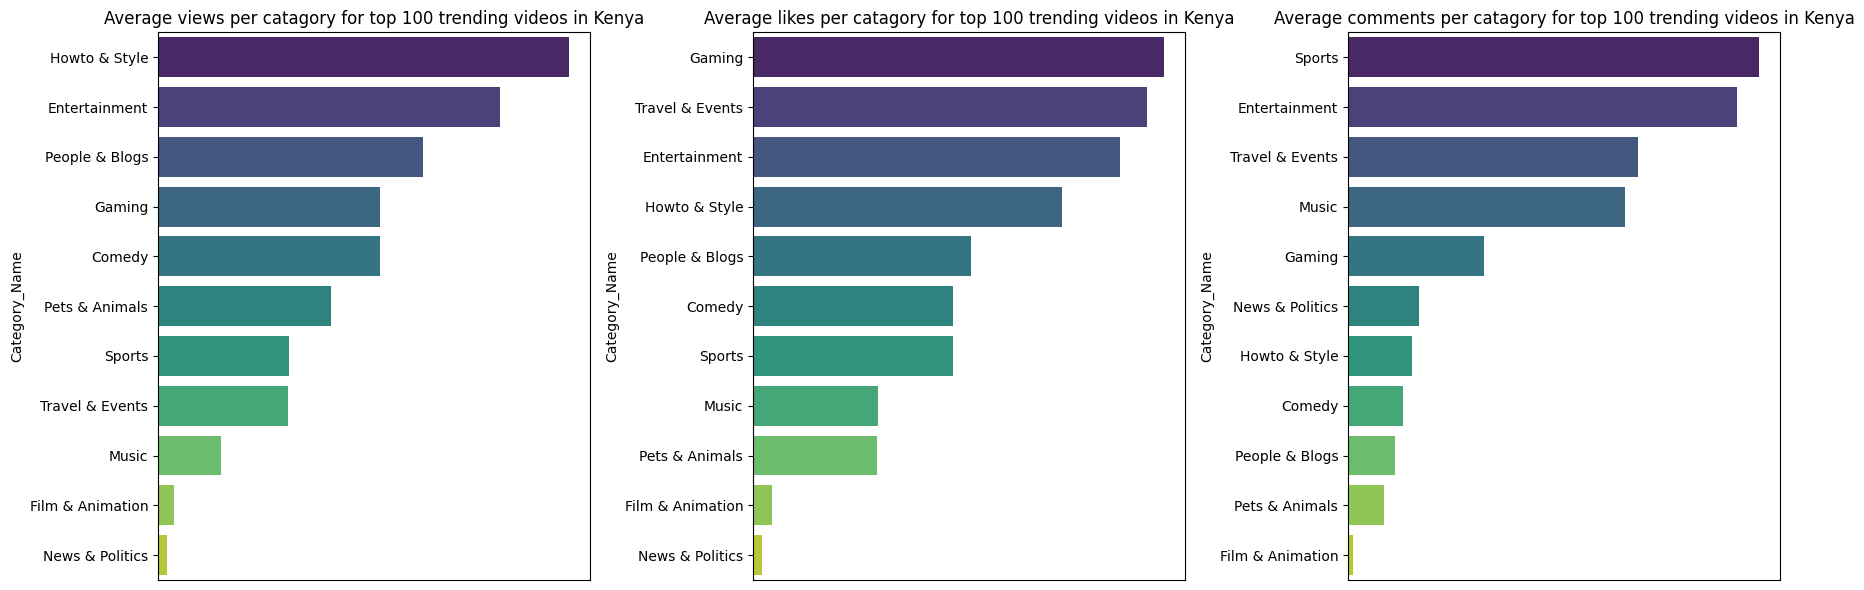

In [18]:
categories_engagement = trending_videos.groupby('Category_Name')[['likes','views','comments']].mean()

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
# views
category='views'
categories_engagement_sorted = categories_engagement.sort_values(by=category,ascending=False)
sns.barplot(x=categories_engagement_sorted['views'],y=categories_engagement_sorted.index,order=categories_engagement_sorted.index,palette='viridis',hue=categories_engagement_sorted.index)
plt.title('Average views per catagory for top 100 trending videos in Kenya')
plt.xlabel('')
plt.xticks([]);
#likes
category='likes'
categories_engagement_sorted = categories_engagement.sort_values(by=category,ascending=False)
plt.subplot(1,3,2)
sns.barplot(x=categories_engagement_sorted['likes'],y=categories_engagement_sorted.index,order=categories_engagement_sorted.index,palette='viridis',hue=categories_engagement_sorted.index)
plt.title('Average likes per catagory for top 100 trending videos in Kenya')
plt.xlabel('')
plt.xticks([]);
#comments
category='comments'
categories_engagement_sorted = categories_engagement_sorted.sort_values(by=category,ascending=False)
plt.subplot(1,3,3)
sns.barplot(x=categories_engagement_sorted['comments'],y=categories_engagement_sorted.index,order=categories_engagement_sorted.index,palette='viridis',hue=categories_engagement_sorted.index)
plt.title('Average comments per catagory for top 100 trending videos in Kenya')
plt.xlabel('')
plt.xticks([]);

plt.tight_layout()

### Observation

- **Across all engagement metrics, Entertainment has the highest engagement metrics.** 

- **High Engagement Metrics in Entertainment, News, and Politics:**
  - **Entertainment:** Has the highest number of trending videos and high engagement metrics. This suggests that Entertainment content is highly engaging to a broad audience.
  - **News & Politics:** Also shows high engagement metrics but has only 2 trending videos out of the top 100. This indicates that while the content is engaging, it is less frequent among the top trending videos.

- **Low Number of Trending Videos for News & Politics:**
  - News & Politics have only 2 trending videos out of the 100, suggesting that these types of videos are less frequent in the top 100 trending videos compared to Entertainment videos.

### Possible Explanations

- **Viewer Demographics and Preferences:**
  - **Entertainment:** This category may appeal to a wider audience and generate more interactions (likes, shares, comments) due to its broad appeal and high shareability.
  - **News & Politics:** Content in this category may attract a niche audience that is highly engaged but not as large in number. Engagement could be intense but limited in scope.

- **Content Frequency and Trends:**
  - **Entertainment:** The frequency of Entertainment content in trending lists is higher, possibly due to its broad and diverse audience. This category might dominate the trending charts because it generates more content and garners higher engagement rates.
  - **News & Politics:** Although highly engaging, the content might be less frequent or relevant in trending algorithms, which could be more influenced by recent or viral content.

- **Algorithm and Trending Mechanisms:**
  - The algorithm that determines trending videos might prioritize content that is currently more viral or has a higher engagement spike. Entertainment content often sees more spikes due to its nature, while News and Politics might have more steady but less volatile engagement patterns.

- **Content Lifecycle and Timeliness:**
  - **Entertainment:** New and viral Entertainment videos can quickly gain traction and trend.
  - **News & Politics:** News and political content may have a shorter trending lifecycle, where a video trends briefly and then fades, making it less prominent in a top-100 list compared to Entertainment.

### Analysis and Implications

- **Engagement Metrics:** High engagement metrics for both categories indicate that viewers are interacting intensely with the content they are interested in.
- **Demographic Influence:** Different viewer demographics might be driving engagement in various ways. For instance, younger audiences might engage more with Entertainment content, while politically active viewers might show high engagement with News and Political content but in smaller quantities.


**Breaking down the video durations and publish times**

In [19]:
trending_videos['video_duration_sec'] = trending_videos['video_duration'].apply(lambda date: isodate.parse_duration(date).total_seconds())
trending_videos['video_duration_sec'].describe().T

count     100.00
mean      818.04
std      2844.53
min        10.00
25%        32.00
50%        97.50
75%       262.75
max     24837.00
Name: video_duration_sec, dtype: float64

The shortest video is 12 seconds lonh while the longest video is 8763 seconds. Instead of converting the date format to seconds, we could bin the data into categories:
- 0-5 minutes
- 5-15 minutes
- 15-30 minutes
- 30-60 minutes
- 60-90 minutes # 1 hour and 30 minutes
- 90 - 120 minutes # 2 hrs 
- 120 - 1440 minutes(the longest youtube video is 24 hours)

In [20]:
video_length_labels = [
    'Quick Snack (0-5 min)',
    'Quick Adventure (5-15 min)',
    'Mini-Binge (15-30 min)',
    'Deep Dive(30-60 min)',
    'Blockbuster (1-1.5 hrs)',
    'Epic Journey (1.5-2hrs)',
    'Marathon (2+ hrs)'
    ]


In [21]:
trending_videos['video_length'] = pd.cut(
  trending_videos['video_duration_sec'],
  bins=[0,300,900,1800,3600,5400,7200,864000],
  right=True,
  labels=video_length_labels
  )

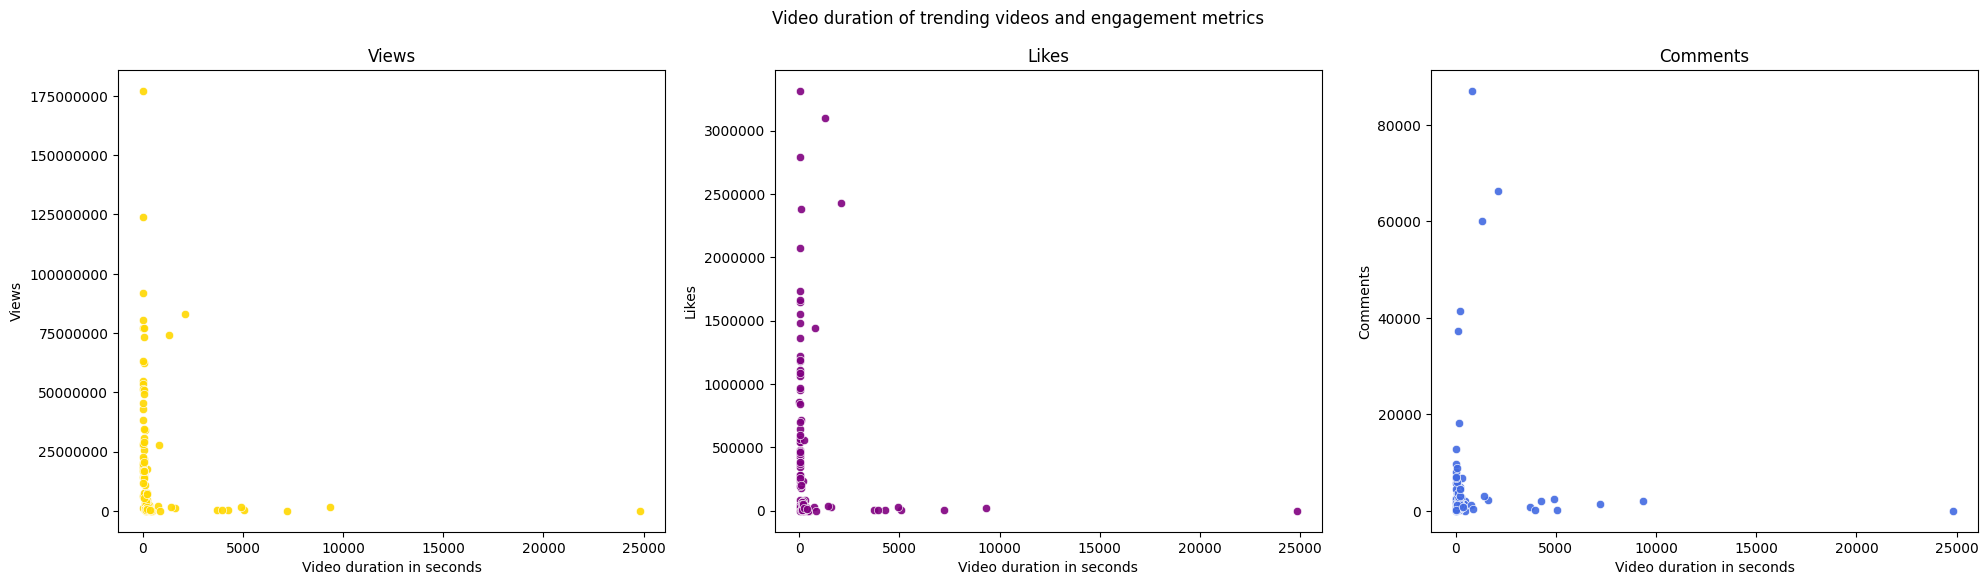

In [22]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.scatterplot(data=trending_videos,x='video_duration_sec',y='views',color='#FFD700',alpha=0.9)
plt.xlabel('Video duration in seconds')
plt.ylabel('Views')
plt.title('Views')
plt.ticklabel_format(style='plain', axis='y')  # Prevent scientific notation

plt.subplot(1,3,2)
sns.scatterplot(data=trending_videos,x='video_duration_sec',y='likes',color='purple',alpha=0.9)
plt.xlabel('Video duration in seconds')
plt.ylabel('Likes')
plt.title('Likes')
plt.ticklabel_format(style='plain', axis='y')  # Prevent scientific notation

plt.subplot(1,3,3)
sns.scatterplot(data=trending_videos,x='video_duration_sec',y='comments',color='#4169E1',alpha=0.9)
plt.xlabel('Video duration in seconds')
plt.ylabel('Comments')
plt.title('Comments')
plt.ticklabel_format(style='plain', axis='y')  # Prevent scientific notation

plt.suptitle("Video duration of trending videos and engagement metrics");

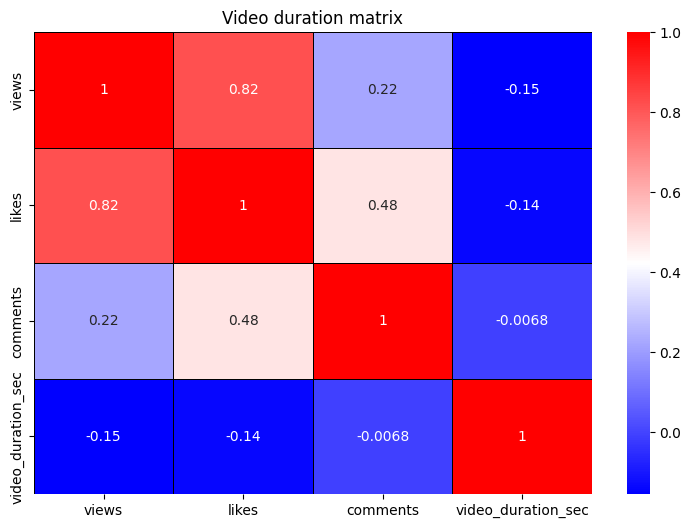

In [23]:
plt.figure(figsize=(9,6))
video_duration_matrix = trending_videos[['views', 'likes', 'comments', 'video_duration_sec']].corr()
sns.heatmap(video_duration_matrix,annot=True,cmap='bwr',linecolor='black',linewidths=.6);
plt.title("Video duration matrix");


- There's is weak negative correlation between views and video duration. This suggests that video length has little to no impact on the number of views.
- There's a weak negative correlation between likes and video duration. The length of the video does not have a significant impact on the number of likes.
- There's a weak positive correlation between comments and video duration. Longer videos might receive slightly more comments, but the relationship is not strong.

In [24]:
video_length_labels_df = trending_videos.groupby('video_length',observed=False)[['views', 'likes', 'comments', 'video_duration_sec']].mean()

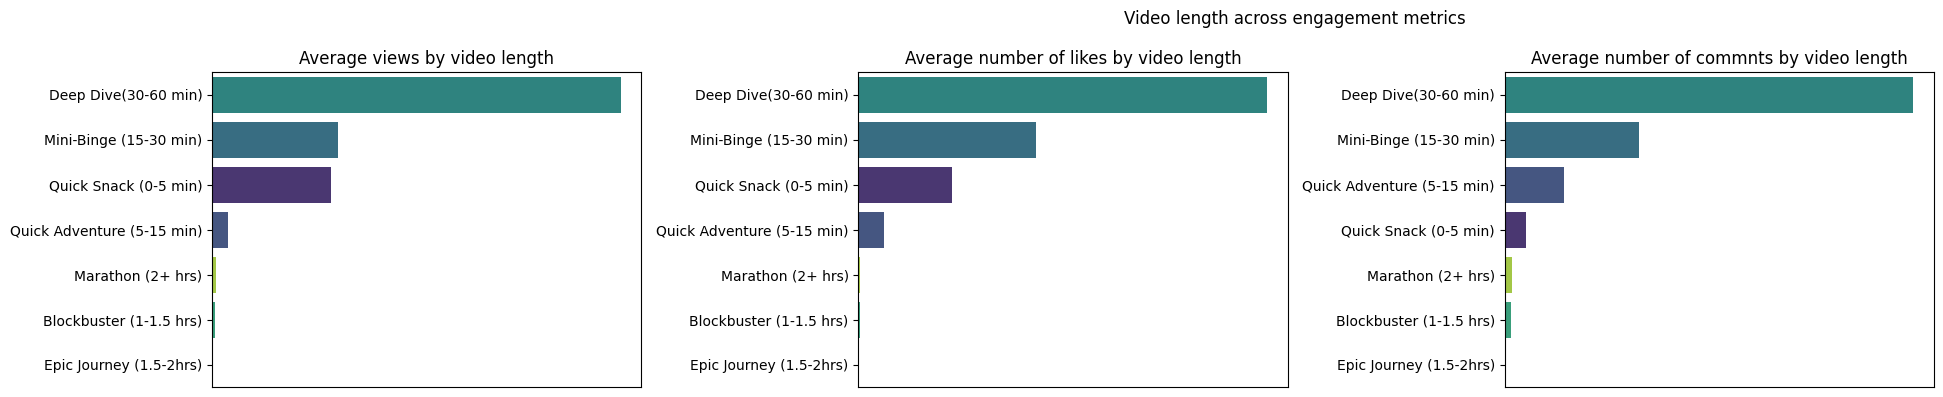

In [25]:
plt.figure(figsize=(26,4))
#views
metric = 'views'
video_length_labels_sorted = video_length_labels_df.sort_values(by=metric,ascending=False)
plt.subplot(1,4,1)
sns.barplot(x=video_length_labels_sorted['views'],y=video_length_labels_sorted.index,palette='viridis',hue=video_length_labels_sorted.index,order=video_length_labels_sorted.index);
plt.title("Average views by video length")
plt.ylabel("")
plt.xticks([])
plt.xlabel('');
# likes
metric = 'likes'
video_length_labels_sorted = video_length_labels_df.sort_values(by=metric,ascending=False)
plt.subplot(1,4,2)
sns.barplot(x=video_length_labels_sorted['likes'],y=video_length_labels_sorted.index,palette='viridis',hue=video_length_labels_sorted.index,order=video_length_labels_sorted.index);
plt.title("Average number of likes by video length")
plt.ylabel("")
plt.xticks([])
plt.xlabel('')
#comments
metric = 'comments'
video_length_labels_sorted = video_length_labels_df.sort_values(by=metric,ascending=False)
plt.subplot(1,4,3)
sns.barplot(x=video_length_labels_sorted['comments'],y=video_length_labels_sorted.index,palette='viridis',hue=video_length_labels_sorted.index,order=video_length_labels_sorted.index);
plt.title("Average number of commnts by video length")
plt.ylabel("")
plt.xticks([])
plt.xlabel('')
plt.suptitle("Video length across engagement metrics")
plt.tight_layout();

Vidoes that are between 30 and 60 minutes have the best engagement metrics. However, given that most of the trending videos belong to the Entertainment, Sports and People&Blogs categories, this observation is explained.

**What contributes to higher engagement metrics for 30-60 minute videos?**

**Content Depth and Quality**

- **Entertainment**: Long-form content in the Entertainment category, such as movies, TV shows, or in-depth reviews, often provides more engaging and immersive experiences, which can lead to higher viewer retention and engagement.
- **Sports**: Sports events and analysis often benefit from longer formats, as they can cover detailed game highlights, commentary, and post-match analysis.
- **People & Blogs**: Vlogs and personal stories that dive deeper into a topic can resonate more with audiences, leading to better engagement.

**Audience Expectation**

- **Expectations**: Viewers in these categories might prefer longer content as it aligns with their expectations for comprehensive coverage and entertainment. For instance, fans of sports events expect full match coverage and analysis, which naturally leads to longer videos.

**Category Characteristics**

- **Entertainment**: Shows, movies, and series are typically longer, and successful videos in this category often have higher engagement due to their production quality and content depth.
- **Sports**: Detailed sports analysis or highlight reels are often longer and attract engaged viewers who are interested in thorough coverage.
- **People & Blogs**: Long-form vlogs and discussions can provide more value and personal connection, contributing to higher engagement metrics.

**Viewer Retention**

- **Longer Engagement**: Videos that are between 30 and 60 minutes might capture and retain viewers' attention better, especially if the content is engaging and well-produced. This results in higher engagement metrics such as likes and comments.

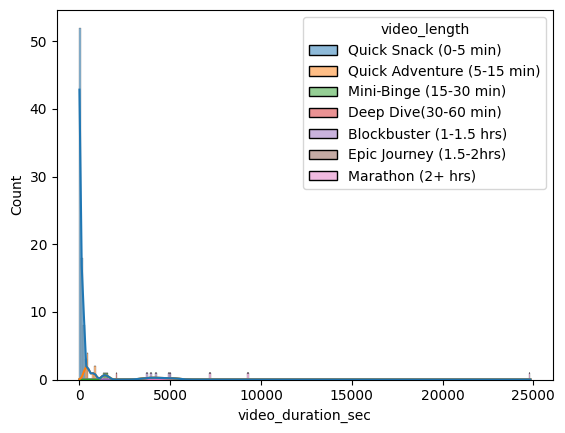

In [26]:
categories_grouped = trending_videos.groupby('Category_Name',observed=False)[['video_duration_sec']]
sns.histplot(data=trending_videos,x='video_duration_sec',hue='video_length',multiple='stack',kde=True);

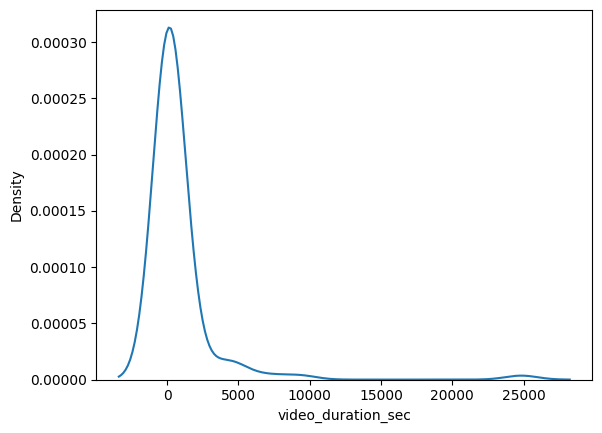

In [27]:
sns.kdeplot(trending_videos['video_duration_sec']);

Video duration is right skewed with the highest number of trending videos being between 0 and 5 minutes. We have no videos between 1 and 2 hours long trending.

- There's is weak negative correlation between views and video duration. This suggests that video length has little to no impact on the number of views.
- There's a weak negative correlation between likes and video duration. The length of the video does not have a significant impact on the number of likes.
- There's a weak positive correlation between comments and video duration. Longer videos might receive slightly more comments, but the relationship is not strong.

In [28]:
video_length_labels_df = trending_videos.groupby('video_length',observed=False)[['views', 'likes', 'comments', 'video_duration_sec']].mean()

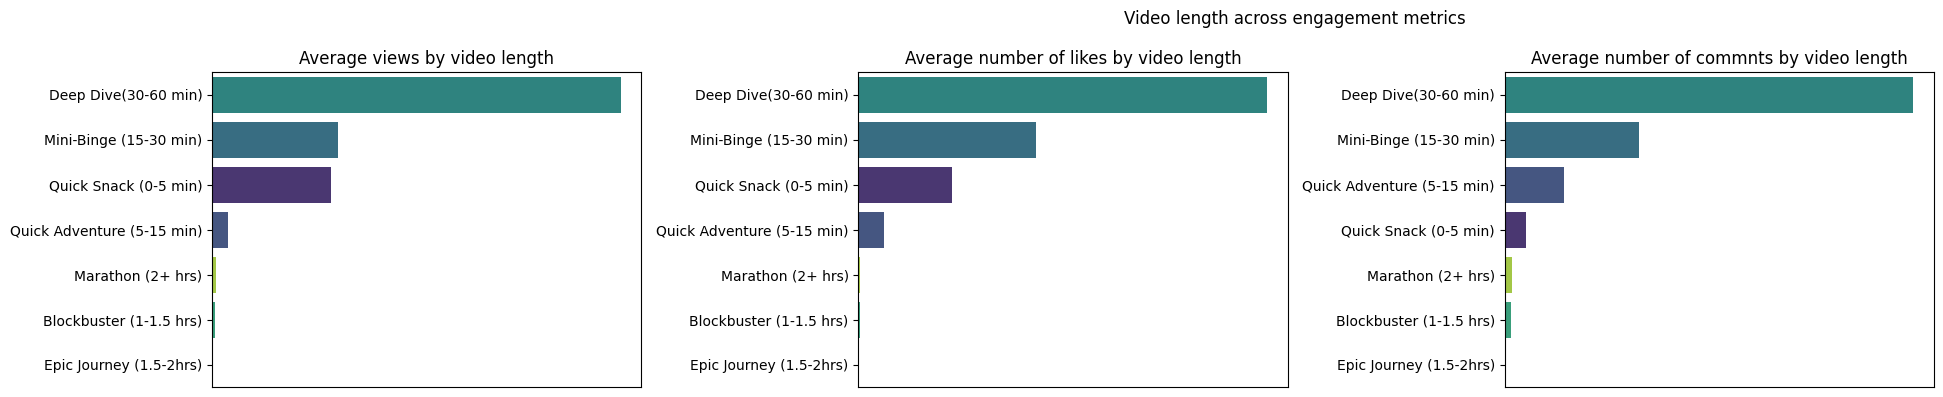

In [29]:
plt.figure(figsize=(26,4))
#views
metric = 'views'
video_length_labels_sorted = video_length_labels_df.sort_values(by=metric,ascending=False)
plt.subplot(1,4,1)
sns.barplot(x=video_length_labels_sorted['views'],y=video_length_labels_sorted.index,palette='viridis',hue=video_length_labels_sorted.index,order=video_length_labels_sorted.index);
plt.title("Average views by video length")
plt.ylabel("")
plt.xticks([])
plt.xlabel('');
# likes
metric = 'likes'
video_length_labels_sorted = video_length_labels_df.sort_values(by=metric,ascending=False)
plt.subplot(1,4,2)
sns.barplot(x=video_length_labels_sorted['likes'],y=video_length_labels_sorted.index,palette='viridis',hue=video_length_labels_sorted.index,order=video_length_labels_sorted.index);
plt.title("Average number of likes by video length")
plt.ylabel("")
plt.xticks([])
plt.xlabel('')
#comments
metric = 'comments'
video_length_labels_sorted = video_length_labels_df.sort_values(by=metric,ascending=False)
plt.subplot(1,4,3)
sns.barplot(x=video_length_labels_sorted['comments'],y=video_length_labels_sorted.index,palette='viridis',hue=video_length_labels_sorted.index,order=video_length_labels_sorted.index);
plt.title("Average number of commnts by video length")
plt.ylabel("")
plt.xticks([])
plt.xlabel('')
plt.suptitle("Video length across engagement metrics")
plt.tight_layout();

Vidoes that are between 30 and 60 minutes have the best engagement metrics. However, given that most of the trending videos belong to the Entertainment, Sports and People&Blogs categories, this observation is explained.

**What contributes to higher engagement metrics for 30-60 minute videos?**

**Content Depth and Quality**

- **Entertainment**: Long-form content in the Entertainment category, such as movies, TV shows, or in-depth reviews, often provides more engaging and immersive experiences, which can lead to higher viewer retention and engagement.
- **Sports**: Sports events and analysis often benefit from longer formats, as they can cover detailed game highlights, commentary, and post-match analysis.
- **People & Blogs**: Vlogs and personal stories that dive deeper into a topic can resonate more with audiences, leading to better engagement.

**Audience Expectation**

- **Expectations**: Viewers in these categories might prefer longer content as it aligns with their expectations for comprehensive coverage and entertainment. For instance, fans of sports events expect full match coverage and analysis, which naturally leads to longer videos.

**Category Characteristics**

- **Entertainment**: Shows, movies, and series are typically longer, and successful videos in this category often have higher engagement due to their production quality and content depth.
- **Sports**: Detailed sports analysis or highlight reels are often longer and attract engaged viewers who are interested in thorough coverage.
- **People & Blogs**: Long-form vlogs and discussions can provide more value and personal connection, contributing to higher engagement metrics.

**Viewer Retention**

- **Longer Engagement**: Videos that are between 30 and 60 minutes might capture and retain viewers' attention better, especially if the content is engaging and well-produced. This results in higher engagement metrics such as likes and comments.

**Evaluating time of upload against the views**

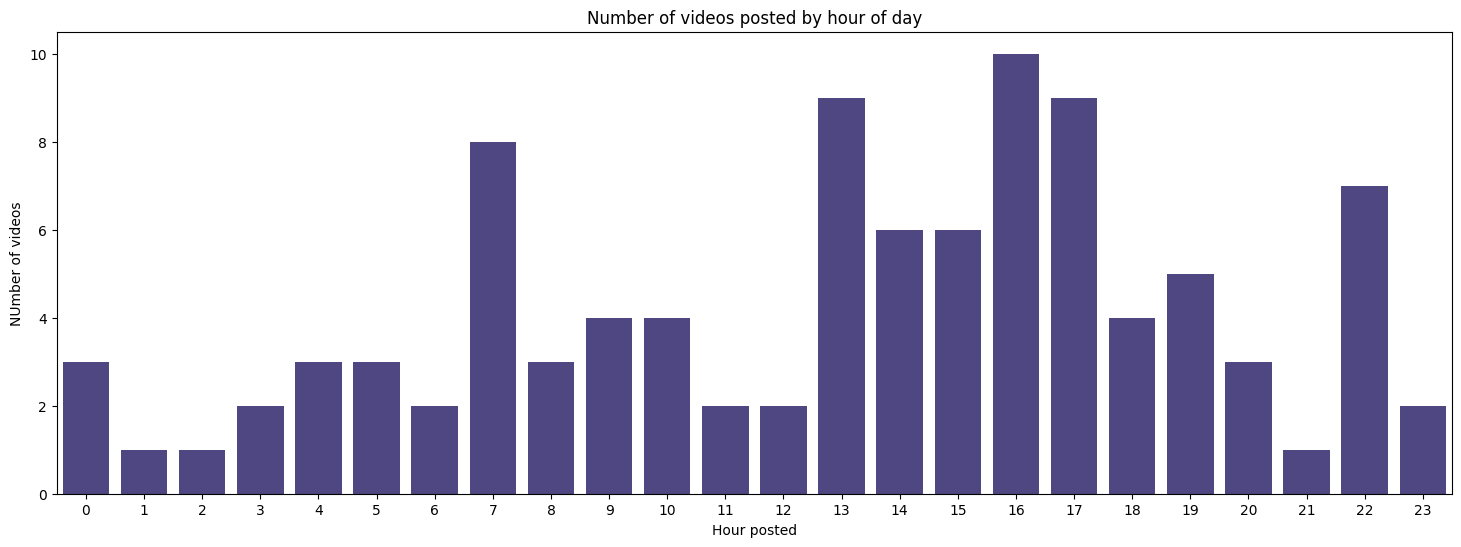

In [30]:
trending_videos['hour_posted']=trending_videos['time_published'].dt.hour
plt.figure(figsize=(18,6))
sns.countplot(x='hour_posted',data=trending_videos,color='darkslateblue')
plt.title("Number of videos posted by hour of day")
plt.xlabel("Hour posted")
plt.ylabel("NUmber of videos");

Most videos are published between 12 p.m and 5 p.m.

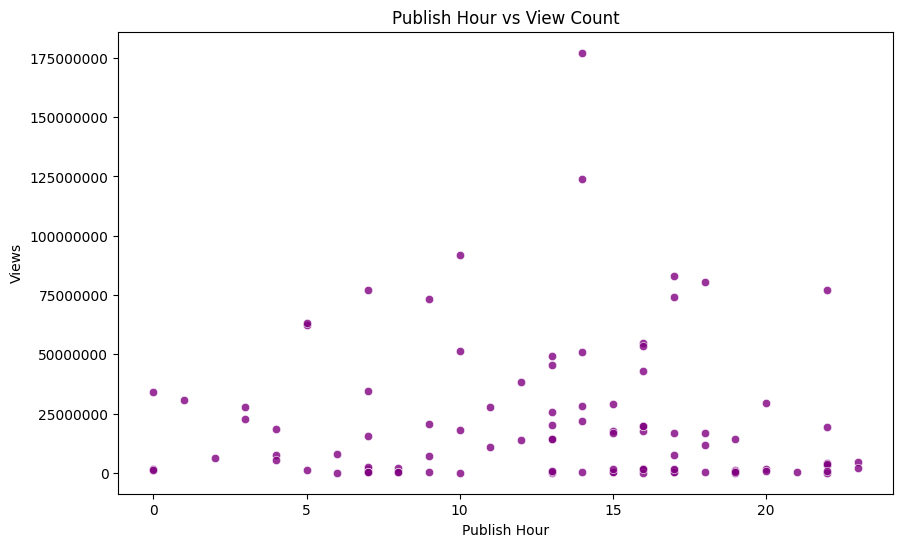

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=trending_videos,x='hour_posted',y='views',color='purple',alpha=0.8)
plt.ticklabel_format(style='plain', axis='y')  # Prevent scientific notation
plt.title("Publish Hour vs View Count")
plt.xlabel("Publish Hour")
plt.ylabel("Views");

Again, most video are watched from 12 p.m and 5 p.m. This means that most users are on the platform at this time which would be a good time to publish videos, the initial uptake of content after its been posted contributes to trending.

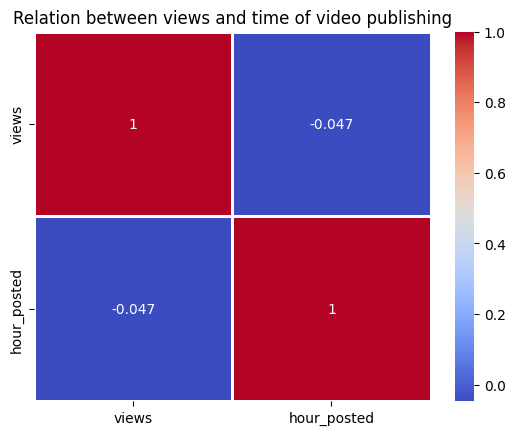

In [32]:
corr_matrix_2 = trending_videos[['views','hour_posted']].corr()
sns.heatmap(corr_matrix_2,annot=True,cmap='coolwarm',linecolor='white',linewidths=.8)
plt.title("Relation between views and time of video publishing");

There's a weak negative correlation between time of video publishing and views which suggests that the publish hour has a very minimal effect on engagement metrics.

**Conclusion**

While engagement is primarily based on subrscribers and a creators content, its clear that a data driven approach to this can be beneficial in identifying strategies to ensure maximum engagement such as posting during peak viewing times and focusing on categories that over time have the highest engagement metrics.

**Future Considerations**
- Setting up the scraper as a cron job that runs every day so as to curate a dataset of trending videos in Kenya over time to explore seasonality and develop better data driven strategies